# Harmonics

We have spent a lot of time talking about sinusoids in the previous lessons, but in this lesson, we are going to cover a phenomenon that occurs in real-world signals.

Whenever we have a non-sinusoidal periodic signal, we will see periodic spikes in the frequency domain. The first spike will occur at the fundamental frequency, and the following spikes are known as **harmonics**.

Let's see this for ourselves.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpld3
import scipy as sp
from scipy import io, signal

In [2]:
import mpld3
mpld3.enable_notebook()

Load an accelerometer signal from the wrist while jogging.

In [3]:
sig = sp.io.loadmat("DATA_11_TYPE02.mat")['sig']
fs = 125
seg = sig[3][9000:10000]
seg -= np.mean(seg)

And plot it...

In [4]:
%matplotlib inline

Text(0.5, 0, 'Time (sec)')

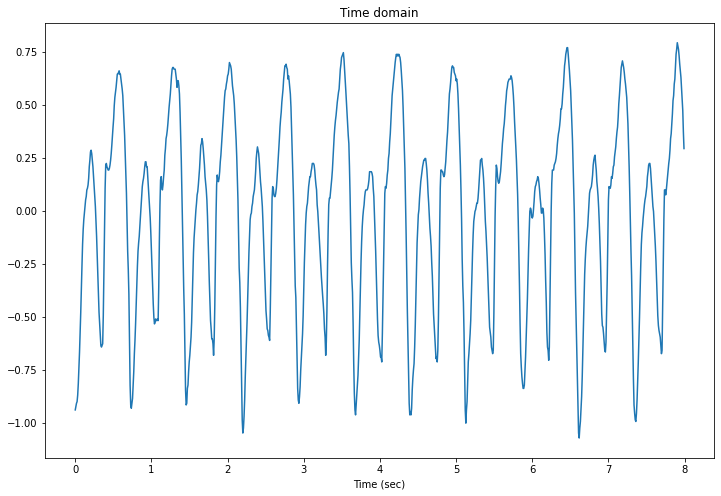

In [5]:
ts = np.arange(len(seg)) / fs
plt.figure(figsize=(12, 8))
plt.plot(ts, seg)
plt.title('Time domain')
plt.xlabel('Time (sec)')

And let's look at the Fourier transform...

In [6]:
nfft = len(seg)
fft = np.fft.rfft(seg)
freqs = np.fft.rfftfreq(len(seg), 1/fs)

Text(0.5, 0, 'Frequency (Hz)')

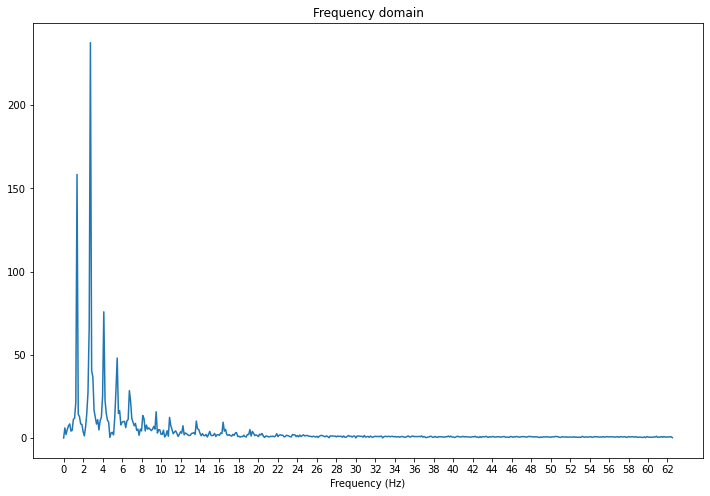

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(freqs, np.abs(fft))
plt.xticks(np.arange(0, freqs[-1], 2));
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')

Lo and behold, we find periodic spikes in the frequency domain!

The first one occurs at roughly 1.375 Hz. This is our fundamental frequency.

In [12]:
fundamental = freqs[np.argmax(np.abs(fft)[freqs < 2])]
fundamental

1.375

Let's compute integer multiples of this fundamental frequency and see how well they match up with our spikes.

In [13]:
harmonics = fundamental * np.arange(1, 9)
harmonics

array([ 1.375,  2.75 ,  4.125,  5.5  ,  6.875,  8.25 ,  9.625, 11.   ])

Text(0.5, 0, 'Frequency (Hz)')

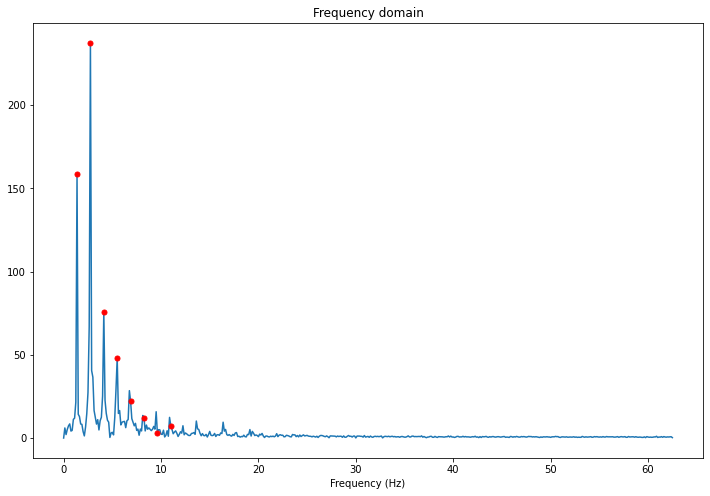

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(freqs, np.abs(fft))
plt.plot(harmonics, np.abs(fft[np.isin(freqs, harmonics)]), 'r.', ms=10)
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')

We can see that the other spikes do indeed correspond to harmonic frequencies of the fundamental frequency.

In fact, if we plot a marker on the original time-domain signal at 1.375 Hz, we can see that it roughly follows the periodicity of that signal or the cadence of the arm swing.

In [18]:
nts = np.arange(len(ts)) / 1.35
ind_nts = np.isin(nts, ts)*1

In [20]:
nts

array([  0.        ,   0.74074074,   1.48148148,   2.22222222,
         2.96296296,   3.7037037 ,   4.44444444,   5.18518519,
         5.92592593,   6.66666667,   7.40740741,   8.14814815,
         8.88888889,   9.62962963,  10.37037037,  11.11111111,
        11.85185185,  12.59259259,  13.33333333,  14.07407407,
        14.81481481,  15.55555556,  16.2962963 ,  17.03703704,
        17.77777778,  18.51851852,  19.25925926,  20.        ,
        20.74074074,  21.48148148,  22.22222222,  22.96296296,
        23.7037037 ,  24.44444444,  25.18518519,  25.92592593,
        26.66666667,  27.40740741,  28.14814815,  28.88888889,
        29.62962963,  30.37037037,  31.11111111,  31.85185185,
        32.59259259,  33.33333333,  34.07407407,  34.81481481,
        35.55555556,  36.2962963 ,  37.03703704,  37.77777778,
        38.51851852,  39.25925926,  40.        ,  40.74074074,
        41.48148148,  42.22222222,  42.96296296,  43.7037037 ,
        44.44444444,  45.18518519,  45.92592593,  46.66

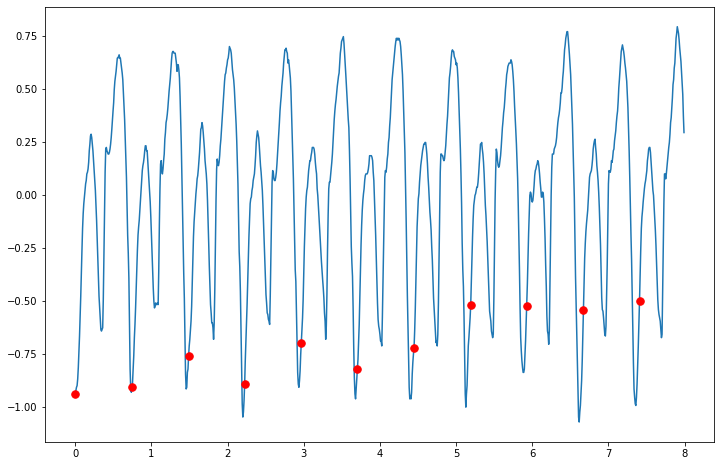

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(ts, seg)
mts = np.mod(ts, 1/1.35) # modulo of ts when divided by 1/1.35 
                         # used to find phases in periodic signals
pds = (mts < mts[1]).nonzero()[0]
plt.plot(ts[pds], seg[pds], 'r.', ms=15)

This phenomenon is important to be aware of as we start to process real world signals. Don't forget that you're no longer dealing with sinusoids.